In [8]:
main_path = 'course-material-time-series-forecasting-product'
nyc_data = main_path+str("/nyc_data.csv")
print(nyc_data)

course-material-time-series-forecasting-product/nyc_data.csv


In [9]:
# Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from prophet.diagnostics import cross_validation

In [12]:
# load the data (for prophete, the Date information must be part of the data and not an index as the project before.)
# YYYY-MM-DD
df = pd.read_csv('./nyc_data.csv')
df.head() 

,Date,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
0,1/1/2015,720.000885,0,0,0,3.68,41.305
1,1/2/2015,581.276773,0,0,0,4.73,131.574
2,1/3/2015,754.117039,0,0,0,7.23,162.700
3,1/4/2015,622.252774,0,0,0,10.96,160.281
4,1/5/2015,785.373319,0,0,0,6.92,51.077


In [13]:
# Rename variable 
# ds = date stamp
df = df.rename(columns={'Demand': 'y', 'Date':'ds'})
df.head()

,ds,y,Easter,Thanksgiving,Christmas,Temperature,Marketing
0,1/1/2015,720.000885,0,0,0,3.68,41.305
1,1/2/2015,581.276773,0,0,0,4.73,131.574
2,1/3/2015,754.117039,0,0,0,7.23,162.700
3,1/4/2015,622.252774,0,0,0,10.96,160.281
4,1/5/2015,785.373319,0,0,0,6.92,51.077


# Transforming the date variable

In [14]:
# YYYY-MM-DD (this is a standard format but also required for the prophet library)
df.ds = pd.to_datetime(df.ds, format="%m/%d/%Y")
df

,ds,y,Easter,Thanksgiving,Christmas,Temperature,Marketing
0,2015-01-01,720.000885,0,0,0,3.68,41.305
1,2015-01-02,581.276773,0,0,0,4.73,131.574
2,2015-01-03,754.117039,0,0,0,7.23,162.700
3,2015-01-04,622.252774,0,0,0,10.96,160.281
4,2015-01-05,785.373319,0,0,0,6.92,51.077
...,...,...,...,...,...,...,...
2187,2020-12-27,685.915026,0,0,0,2.89,38.674
2188,2020-12-28,998.051170,0,0,0,8.83,166.712
2189,2020-12-29,847.123399,0,0,0,3.48,161.865
2190,2020-12-30,857.521043,0,0,0,5.97,179.634


# Holidays

In [15]:
# Easter Holiday
# Get all the Easter dates. 
# To do so, we extract from the DataTable when Easter == 1
# '.ds' means we only get the dates
dates = df[df.Easter == 1].ds

# we create a DataFrame, but also include the window parameter. It represents the days before and the days ahead of the event
# in our case, we do it by choosing '5 days' in advance and only '2 days' afterward

easter = pd.DataFrame({'holiday': 'easter', 'ds':dates, 'lower_window':-5, 'upper_window':2})
easter

,holiday,ds,lower_window,upper_window
94,easter,2015-04-05,-5,2
451,easter,2016-03-27,-5,2
836,easter,2017-04-16,-5,2
1186,easter,2018-04-01,-5,2
1571,easter,2019-04-21,-5,2
1928,easter,2020-04-12,-5,2


In [16]:
# Thanksgiving 
dates = df[df.Thanksgiving == 1].ds
thanksgiving = pd.DataFrame({'holiday': 'thanksgiving', 'ds':dates, 'lower_window':-3, 'upper_window':5})
thanksgiving

,holiday,ds,lower_window,upper_window
329,thanksgiving,2015-11-26,-3,5
693,thanksgiving,2016-11-24,-3,5
1057,thanksgiving,2017-11-23,-3,5
1421,thanksgiving,2018-11-22,-3,5
1792,thanksgiving,2019-11-28,-3,5
2156,thanksgiving,2020-11-26,-3,5


In [17]:
# Christmas 
dates = df[df.Thanksgiving == 1].ds
christmas = pd.DataFrame({'holiday': 'christmas', 'ds':dates, 'lower_window':-7, 'upper_window':7})
christmas

,holiday,ds,lower_window,upper_window
329,christmas,2015-11-26,-7,7
693,christmas,2016-11-24,-7,7
1057,christmas,2017-11-23,-7,7
1421,christmas,2018-11-22,-7,7
1792,christmas,2019-11-28,-7,7
2156,christmas,2020-11-26,-7,7


# Combine all events

In [19]:
# We need to store and merge everything 
holidays = pd.concat([easter, thanksgiving, christmas])
# holidays.head()
holidays

,holiday,ds,lower_window,upper_window
94,easter,2015-04-05,-5,2
451,easter,2016-03-27,-5,2
836,easter,2017-04-16,-5,2
1186,easter,2018-04-01,-5,2
1571,easter,2019-04-21,-5,2
1928,easter,2020-04-12,-5,2
329,thanksgiving,2015-11-26,-3,5
693,thanksgiving,2016-11-24,-3,5
1057,thanksgiving,2017-11-23,-3,5
1421,thanksgiving,2018-11-22,-3,5


# Drop holidays from DataFrame

In [10]:
# Note that by dropping the holidays we have our regressors (temperature and marketing)
df_final = df.drop(columns=["Easter", "Thanksgiving", "Christmas"])
df_final.head()

,ds,y,Temperature,Marketing
0,2015-01-01,720.000885,3.68,41.305
1,2015-01-02,581.276773,4.73,131.574
2,2015-01-03,754.117039,7.23,162.700
3,2015-01-04,622.252774,10.96,160.281
4,2015-01-05,785.373319,6.92,51.077


# Prophet model

In [11]:
from prophet import Prophet

In [12]:
# Building the model 
# It idedntifies the yearly,weakly and daily data automatically if the parameter is set to be 'auto' (default value)
m = Prophet(
    holidays=holidays,
    seasonality_mode= "multiplicative", 
    seasonality_prior_scale=10, 
    holidays_prior_scale=10, 
    changepoint_prior_scale=0.05)

# Becacuse our df_final dataframe has the regressors, we need to add the following commands
m.add_regressor("Temperature")
m.add_regressor("Marketing")
m.fit(df_final)

10:19:15 - cmdstanpy - INFO - Chain [1] start processing
10:19:15 - cmdstanpy - INFO - Chain [1] done processing


# Cross validation

> Cross validation here is a bit different from what we expect to be in machine learning/AI models. 

In [13]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

# Plottiing the perfomance metrics over time 
from prophet.plot import plot_cross_validation_metric

In [14]:
# How many days we have in the data set
df.shape[0] - 180 # days

2012

In [15]:
# Cross-Validation
# We always store the cross validation in the following dataFrame
# Where we train and where we test data is similalr to the business goal
df_cv = cross_validation(model = m,
                         horizon = '31 days',   # Lengh of the testing set
                         period = '16 days',    # Each period of 16 days during the cross-validation we make a forescast of 31 days ??
                         initial = '2012 days', # days. when do we start the cross validation?
                         parallel = 'processes')

10:19:16 - cmdstanpy - INFO - Chain [1] start processing
10:19:16 - cmdstanpy - INFO - Chain [1] start processing
10:19:16 - cmdstanpy - INFO - Chain [1] start processing
10:19:16 - cmdstanpy - INFO - Chain [1] start processing
10:19:16 - cmdstanpy - INFO - Chain [1] start processing
10:19:16 - cmdstanpy - INFO - Chain [1] start processing
10:19:16 - cmdstanpy - INFO - Chain [1] start processing
10:19:16 - cmdstanpy - INFO - Chain [1] start processing
10:19:20 - cmdstanpy - INFO - Chain [1] done processing
10:19:20 - cmdstanpy - INFO - Chain [1] done processing
10:19:20 - cmdstanpy - INFO - Chain [1] done processing
10:19:20 - cmdstanpy - INFO - Chain [1] done processing
10:19:20 - cmdstanpy - INFO - Chain [1] done processing
10:19:20 - cmdstanpy - INFO - Chain [1] done processing
10:19:20 - cmdstanpy - INFO - Chain [1] done processing
10:19:20 - cmdstanpy - INFO - Chain [1] start processing
10:19:21 - cmdstanpy - INFO - Chain [1] start processing
10:19:21 - cmdstanpy - INFO - Chain [1

In [16]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-07-10,607.268747,538.957790,671.007368,571.069531,2020-07-09
1,2020-07-11,722.777549,653.541687,786.933500,677.106981,2020-07-09
2,2020-07-12,637.214096,571.091672,707.010629,619.572774,2020-07-09
3,2020-07-13,769.211344,706.029297,838.142395,808.932621,2020-07-09
4,2020-07-14,636.446952,569.595335,701.550805,661.791644,2020-07-09


In [17]:
# Performance metrics
performance_metrics(df_cv).head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4 days,2737.445990,52.320608,42.465500,0.057816,0.058869,0.058868,0.800000
1,5 days,2768.921158,52.620539,43.759291,0.061246,0.064068,0.062016,0.767742
2,6 days,3520.252499,59.331716,50.449499,0.069838,0.065580,0.071271,0.703226
3,7 days,2914.085297,53.982268,44.224943,0.062281,0.063703,0.063425,0.703226
4,8 days,2841.998195,53.310395,42.196775,0.058345,0.057753,0.059935,0.732258


In [18]:
# rmse and mape
RMSE = round(performance_metrics(df_cv)["rmse"].mean(),3) # 
MAPE = round(performance_metrics(df_cv)["mape"].mean(),3) # * 100 to make it percentage
RMSE, MAPE

(53.681, 0.058)

/home/renan/.python_env/lib/python3.11/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/home/renan/.python_env/lib/python3.11/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


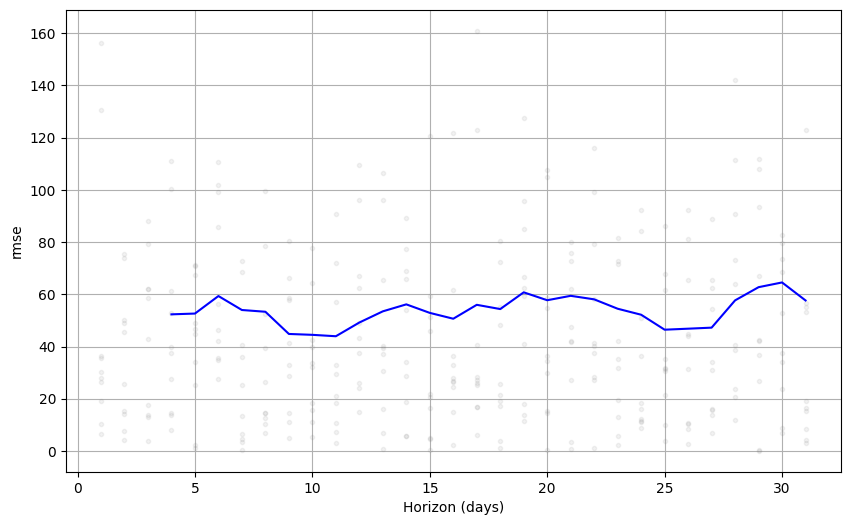

In [19]:
plot_cross_validation_metric(df_cv, metric='rmse');

/home/renan/.python_env/lib/python3.11/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/home/renan/.python_env/lib/python3.11/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


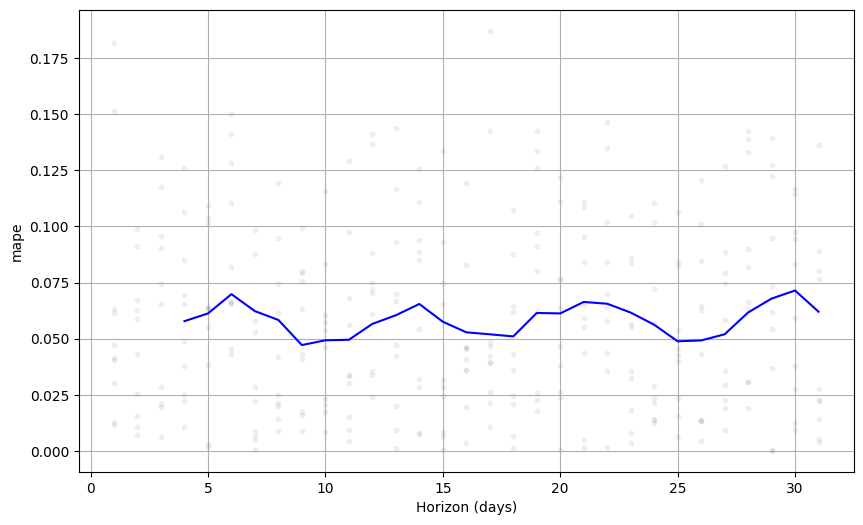

In [20]:
plot_cross_validation_metric(df_cv, metric='mape');

# Parameter Tuning

In [21]:
from sklearn.model_selection import ParameterGrid
from tqdm import tqdm

In [22]:
param_grid = {
    'seasonality_mode':["additive", "multiplicative"],
    'seasonality_prior_scale': [5,10,20],
    'holidays_prior_scale': [5, 10, 20],
    'changepoint_prior_scale': [0.01, 0.05, 0.1]}

grid = ParameterGrid(param_grid)
print(len(list(grid)))
print(list(grid))

54
[{'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 5, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 5}, {'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 5, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10}, {'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 5, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 20}, {'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 5, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 5}, {'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 5, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10}, {'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 5, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 20}, {'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 10, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 5}, {'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 10, 'seasonality_mode': 'additive', 'seasonalit

In [24]:
# Store the results 
rmse = []

# loop 
for params in tqdm(grid):
    # model 
    m = Prophet(
        holidays=holidays,
        seasonality_mode = params['seasonality_mode'], 
        seasonality_prior_scale = params['seasonality_prior_scale'], 
        holidays_prior_scale = params['holidays_prior_scale'], 
        changepoint_prior_scale = params['changepoint_prior_scale'])

    # Becacuse our df_final dataframe has the regressors, we need to add the following commands
    m.add_regressor("Temperature")
    m.add_regressor("Marketing")
    m.fit(df_final)

    # cross validation 
    df_cv = cross_validation(model = m,
                            horizon = '31 days',   # Lengh of the testing set
                            period = '16 days',    # Each period of 16 days during the cross-validation we make a forescast of 31 days ??
                            initial = '2012 days', # days. when do we start the cross validation?
                            parallel = 'processes')

    # measure and store error
    error = round(performance_metrics(df_cv)["rmse"].mean(),3) # 
    rmse.append(error);

  0%|          | 0/54 [00:00<?, ?it/s]10:19:24 - cmdstanpy - INFO - Chain [1] start processing
10:19:24 - cmdstanpy - INFO - Chain [1] done processing
10:19:25 - cmdstanpy - INFO - Chain [1] start processing
10:19:25 - cmdstanpy - INFO - Chain [1] start processing
10:19:25 - cmdstanpy - INFO - Chain [1] start processing
10:19:25 - cmdstanpy - INFO - Chain [1] start processing
10:19:25 - cmdstanpy - INFO - Chain [1] start processing
10:19:25 - cmdstanpy - INFO - Chain [1] start processing
10:19:25 - cmdstanpy - INFO - Chain [1] start processing
10:19:25 - cmdstanpy - INFO - Chain [1] start processing
10:19:26 - cmdstanpy - INFO - Chain [1] done processing
10:19:26 - cmdstanpy - INFO - Chain [1] done processing
10:19:26 - cmdstanpy - INFO - Chain [1] done processing
10:19:26 - cmdstanpy - INFO - Chain [1] done processing
10:19:26 - cmdstanpy - INFO - Chain [1] done processing
10:19:26 - cmdstanpy - INFO - Chain [1] done processing
10:19:26 - cmdstanpy - INFO - Chain [1] done processing
1

In [25]:
# Parameter tunning outcome 
tuning_results = pd.DataFrame(grid)
tuning_results['rmse'] = rmse
tuning_results

,changepoint_prior_scale,holidays_prior_scale,seasonality_mode,seasonality_prior_scale,rmse
0,0.01,5,additive,5,48.069
1,0.01,5,additive,10,48.106
2,0.01,5,additive,20,48.414
3,0.01,5,multiplicative,5,48.865
4,0.01,5,multiplicative,10,48.959
5,0.01,5,multiplicative,20,48.855
6,0.01,10,additive,5,48.216
7,0.01,10,additive,10,48.265
8,0.01,10,additive,20,48.072
9,0.01,10,multiplicative,5,48.957


In [30]:
# Exporting the tunned parameters
best_params = tuning_results[tuning_results.rmse == tuning_results.rmse.min()].transpose()
best_params.to_csv("prophete_best_params_forecasting_product.csv")
best_params

,0
changepoint_prior_scale,0.01
holidays_prior_scale,5
seasonality_mode,additive
seasonality_prior_scale,5
rmse,48.069
